/Users/thanos/thanos_midi/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


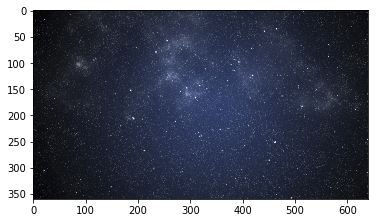

In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
f = ndimage.imread('/Users/thanos/Downloads/night-sky.jpg')

plt.imshow(f)
plt.show()


In [2]:
import sys, math
global x_coord 
global y_coord 
x_coord = []
y_coord = []
def hilbert(x0, y0, xi, xj, yi, yj, n):
    if n <= 0:
        X = x0 + (xi + yi)/2
        Y = y0 + (xj + yj)/2
        x_coord.append(X)
        y_coord.append(Y)
        # Output the coordinates of the cv
        # print '%s %s 0' % (X, Y)
    else:
        hilbert(x0,               y0,               yi/2, yj/2, xi/2, xj/2, n - 1)
        hilbert(x0 + xi/2,        y0 + xj/2,        xi/2, xj/2, yi/2, yj/2, n - 1)
        hilbert(x0 + xi/2 + yi/2, y0 + xj/2 + yj/2, xi/2, xj/2, yi/2, yj/2, n - 1)
        hilbert(x0 + xi/2 + yi,   y0 + xj/2 + yj,  -yi/2,-yj/2,-xi/2,-xj/2, n - 1)
        
    

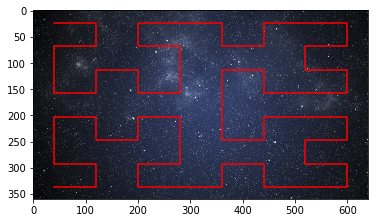

In [3]:
global x_coord 
global y_coord 
x_coord = []
y_coord = []
hilbert(0.0, 0.0, f.shape[1], 0.0, 0.0, f.shape[0], 3)
plt.plot(x_coord, y_coord, color='red')
plt.imshow(f)


In [ ]:
from IPython.display import display, clear_output
import OSC
import time, random
import numpy as np

client = OSC.OSCClient()
client.connect( ( '127.0.0.1', 57120 ) )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(f)



for i in range(0, len(x_coord)):
    clear_output(wait = True)
    time.sleep(0.5)
    x = 60 * (2**(1./12))**(f[int(y_coord[i]),int(x_coord[i])])
    
    x = f[int(y_coord[i]),int(x_coord[i])]
    print x[2]
    
    ax.plot(x_coord, y_coord, color='red')
    ax.imshow(f)
    
    msg = OSC.OSCMessage()
    msg.setAddress("/x")
    msg.append(x[2])
    client.send(msg)


104


In [5]:
msg

['/x', ',i', 17]